In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## .distplot()：ヒストグラム ※seaborn(0.11.0)~ .displot()

In [3]:
df = pd.read_csv('../data/tmdb_5000_movies_profit_sorted.csv')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title_movies,vote_average,vote_count,movie_id,title_credits,cast,crew,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087
1,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Released,Nothing on Earth could come between them.,Titanic,7.5,7562,597,Titanic,"[{""cast_id"": 20, ""character"": ""Rose DeWitt Buk...","[{""credit_id"": ""52fe425ac3a36847f8017985"", ""de...",1645034188


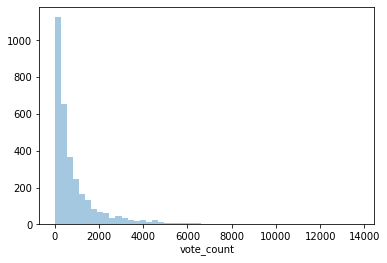

In [5]:
sns.distplot(df['vote_count'], norm_hist=False, kde=False)

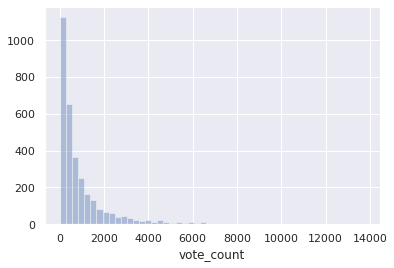

In [6]:
sns.set()
sns.distplot(df['vote_count'], norm_hist=False, kde=False)

## 散布図

### .jointplot()

In [10]:
df = df[df['vote_count'] > 100]
len(df)

2708

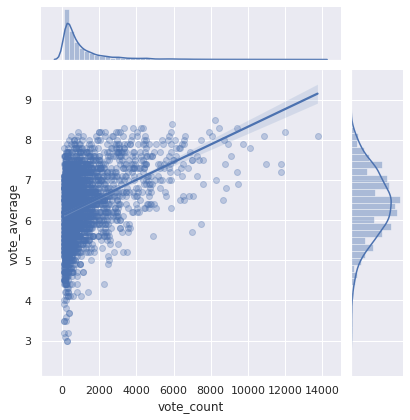

In [16]:
sns.jointplot('vote_count', 'vote_average', data=df, kind='reg', joint_kws={'scatter_kws': dict(alpha=0.3)})

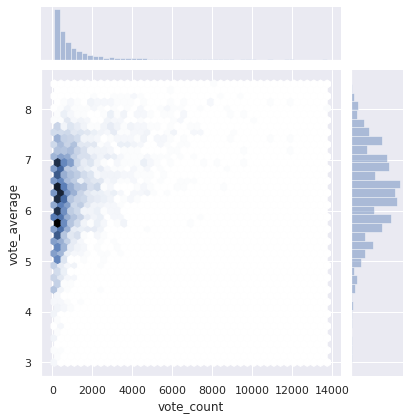

In [18]:
sns.jointplot('vote_count', 'vote_average', data=df, kind='hex')

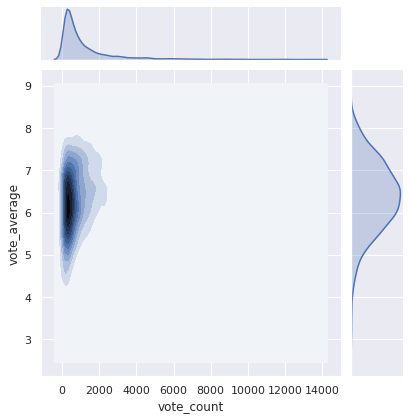

In [19]:
sns.jointplot('vote_count', 'vote_average', data=df, kind='kde')

### .pairplot()

In [22]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_movies', 'vote_average',
       'vote_count', 'movie_id', 'title_credits', 'cast', 'crew', 'profit'],
      dtype='object')

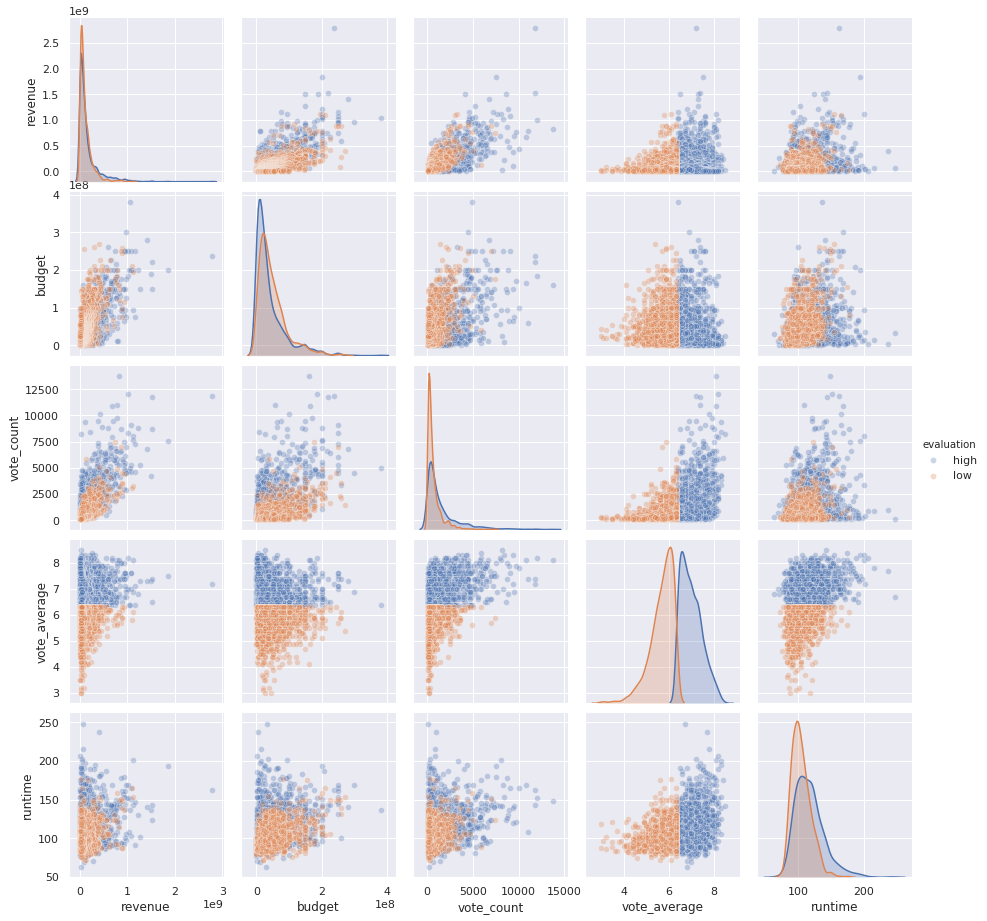

In [43]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'runtime', 'release_date', 'evaluation']], 
             hue='evaluation',
#              kind='reg', 
             plot_kws=dict(alpha=0.3))
#            diag_hist='hist'  対角線のグラフの種類

In [35]:
vote_average_median = df['vote_average'].median()
df['evaluation'] = df['vote_average'].apply(lambda x: 'low' if x < vote_average_mean else 'high')

In [37]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title_movies,vote_average,vote_count,movie_id,title_credits,cast,crew,profit,evaluation
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087,high
1,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Nothing on Earth could come between them.,Titanic,7.5,7562,597,Titanic,"[{""cast_id"": 20, ""character"": ""Rose DeWitt Buk...","[{""credit_id"": ""52fe425ac3a36847f8017985"", ""de...",1645034188,high


## Categorical Plot

### .barplot()

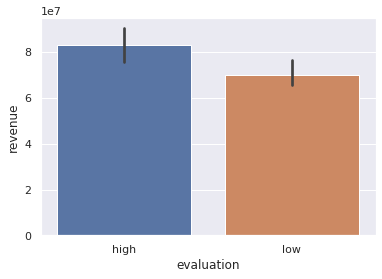

In [49]:
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median) # error bar: CI(confidence interval) 95%の信頼区間

### .countplot()

In [59]:
df['year'] = df['release_date'].apply(lambda x: x[:4])

In [61]:
df['year']

0       2009
1       1997
2       2015
3       2015
4       2012
        ... 
3224    2002
3225    1999
3226    2011
3227    2004
3228    2013
Name: year, Length: 2708, dtype: object

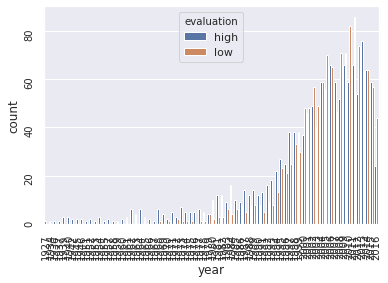

In [74]:
axes = sns.countplot(x='year', data=df, hue='evaluation')
axes.tick_params(rotation=90, labelsize=10)

In [75]:
df['decade'] = df['year'].apply(lambda x :x[:3] + '0s')
df['decade'].head(3)

0    2000s
1    1990s
2    2010s
Name: decade, dtype: object

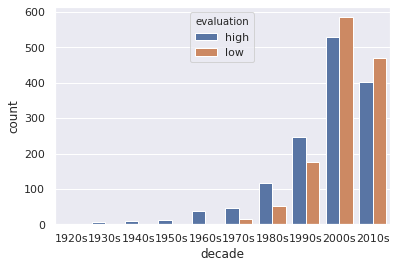

In [78]:
sns.countplot('decade', data=df.sort_values('decade'), hue='evaluation')

### .boxplot()

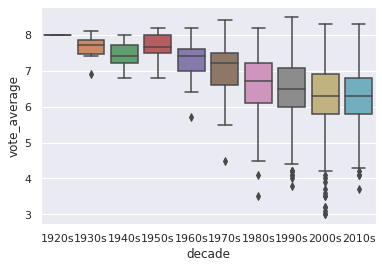

In [80]:
sns.boxplot('decade', 'vote_average', data=df.sort_values('decade'))

### .violinplot()

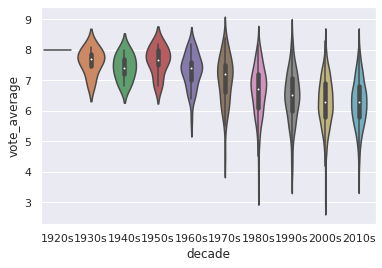

In [81]:
sns.violinplot('decade', 'vote_average', data=df.sort_values('decade'))

### .swarmplot()

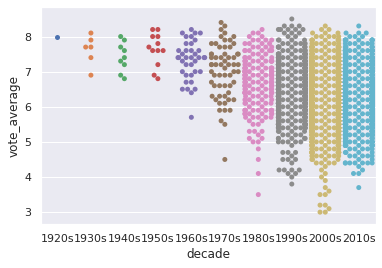

In [82]:
sns.swarmplot('decade', 'vote_average', data=df.sort_values('decade'))

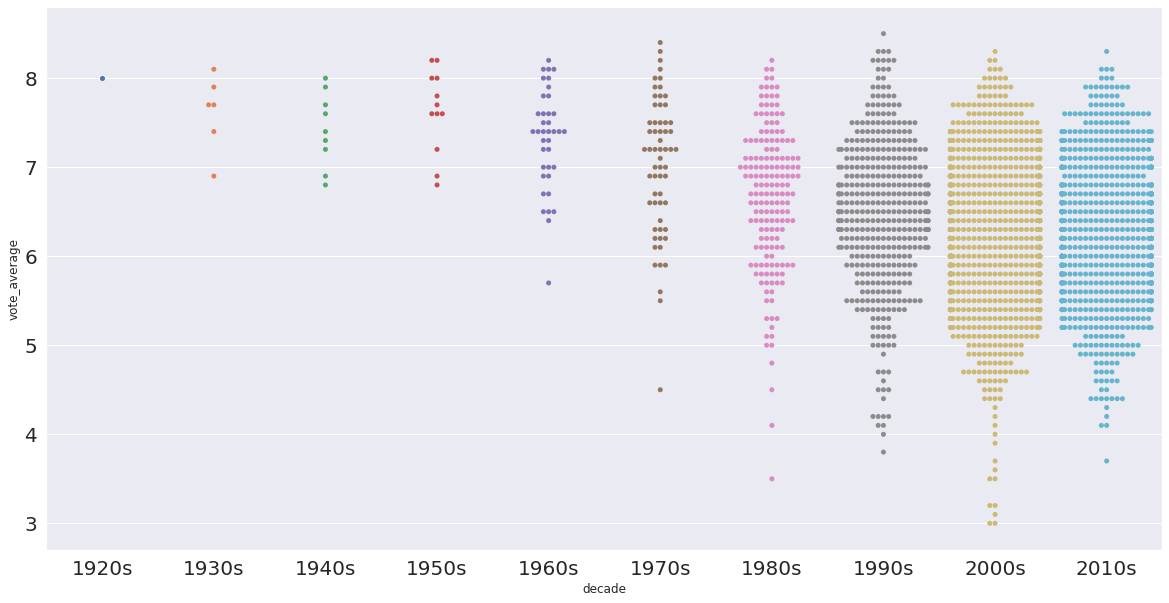

In [89]:
fig, axes = plt.subplots(figsize=(20, 10))
axes.tick_params(labelsize=20)
sns.swarmplot(ax=axes, x='decade', y='vote_average', data=df.sort_values('decade'))

In [86]:
axes

## Heartmap

### df.corr()：各カラムの相関表を出す

In [90]:
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,profit
budget,1.000000,0.006094,0.388090,0.690781,0.252648,-0.073621,0.508605,0.006094,0.532697
id,0.006094,1.000000,0.183048,0.020077,-0.040734,-0.053285,0.104354,1.000000,0.021818
popularity,0.388090,0.183048,1.000000,0.570366,0.200294,0.282471,0.725723,0.183048,0.560537
revenue,0.690781,0.020077,0.570366,1.000000,0.257767,0.170171,0.737696,0.020077,0.979910
runtime,0.252648,-0.040734,0.200294,0.257767,1.000000,0.409848,0.289802,-0.040734,0.232016
vote_average,-0.073621,-0.053285,0.282471,0.170171,0.409848,1.000000,0.392897,-0.053285,0.219482
vote_count,0.508605,0.104354,0.725723,0.737696,0.289802,0.392897,1.000000,0.104354,0.723147
movie_id,0.006094,1.000000,0.183048,0.020077,-0.040734,-0.053285,0.104354,1.000000,0.021818
profit,0.532697,0.021818,0.560537,0.979910,0.232016,0.219482,0.723147,0.021818,1.000000


In [98]:
df = df[(df != 0).all(axis=1)]
len(df)

2708

In [99]:
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,profit
budget,1.000000,0.006094,0.388090,0.690781,0.252648,-0.073621,0.508605,0.006094,0.532697
id,0.006094,1.000000,0.183048,0.020077,-0.040734,-0.053285,0.104354,1.000000,0.021818
popularity,0.388090,0.183048,1.000000,0.570366,0.200294,0.282471,0.725723,0.183048,0.560537
revenue,0.690781,0.020077,0.570366,1.000000,0.257767,0.170171,0.737696,0.020077,0.979910
runtime,0.252648,-0.040734,0.200294,0.257767,1.000000,0.409848,0.289802,-0.040734,0.232016
vote_average,-0.073621,-0.053285,0.282471,0.170171,0.409848,1.000000,0.392897,-0.053285,0.219482
vote_count,0.508605,0.104354,0.725723,0.737696,0.289802,0.392897,1.000000,0.104354,0.723147
movie_id,0.006094,1.000000,0.183048,0.020077,-0.040734,-0.053285,0.104354,1.000000,0.021818
profit,0.532697,0.021818,0.560537,0.979910,0.232016,0.219482,0.723147,0.021818,1.000000


### .heatmap()

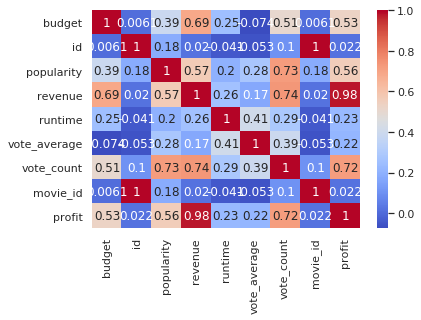

In [104]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [112]:
df['month'] = df['release_date'].apply(lambda x: x.split('-')[1])
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_count,movie_id,title_credits,cast,crew,profit,evaluation,year,decade,month
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087,high,2009,2000s,12
1,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,7562,597,Titanic,"[{""cast_id"": 20, ""character"": ""Rose DeWitt Buk...","[{""credit_id"": ""52fe425ac3a36847f8017985"", ""de...",1645034188,high,1997,1990s,11


In [109]:
df['release_date'].head(2)

0    2009-12-10
1    1997-11-18
Name: release_date, dtype: object

In [118]:
'2009-01-04'.split('-')[1]

'01'

In [119]:
df.groupby(['year', 'month']).mean()[['revenue']] # ['revenue']:Seriesで返ってくる、[['revenue']]:listで渡すとDataFrameで返ってくる

revenue
year month              
1927 01     6.504220e+05
1934 02     4.500000e+06
1936 02     8.500000e+06
1937 12     1.849255e+08
1939 08     3.375497e+07
...                  ...
2016 05     2.747345e+08
     06     2.562691e+08
     07     1.703382e+08
     08     3.275855e+08
     09     1.586157e+07

[501 rows x 1 columns]

In [115]:
df.groupby('month')['revenue'].mean()

month
01    6.546118e+07
02    9.443578e+07
03    1.295534e+08
04    1.373387e+08
05    2.246846e+08
06    2.281203e+08
07    1.739338e+08
08    9.562315e+07
09    7.446775e+07
10    1.005270e+08
11    1.946297e+08
12    1.668202e+08
Name: revenue, dtype: float64

In [123]:
revenue_df = df.groupby(['year', 'month']).mean()[['revenue']].pivot_table(values='revenue', index='month', columns='year')
revenue_df

year,1927,1934,1936,1937,1939,1940,1942,1945,1946,1951,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,,,,,,,,,,,,,,
01,650422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.401817e+07,8.548517e+07,7.059101e+07,5.259054e+07,9.229943e+07,1.114278e+08,7.105923e+07,1.010720e+08,3.897096e+07,1.100579e+08
02,NaN,4500000.0,8500000.0,NaN,NaN,84300000.0,NaN,NaN,NaN,NaN,...,9.071975e+07,1.273158e+08,7.904734e+07,1.030667e+08,7.990561e+07,1.205060e+08,1.042111e+08,1.501230e+08,1.377840e+08,1.132806e+08
03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.372468e+07,3.267620e+07,1.339757e+08,1.956497e+08,9.788364e+07,1.838416e+08,1.722818e+08,2.292273e+08,1.693319e+08,2.554119e+08
04,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN,...,4.688455e+07,1.558895e+08,1.051695e+08,1.498188e+08,1.788393e+08,2.000062e+08,2.102267e+08,1.526641e+08,3.651596e+08,3.430841e+08
05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.492549e+08,2.466259e+08,2.880007e+08,2.021514e+08,2.338193e+08,2.016696e+08,1.580401e+08,3.271891e+08,2.034467e+08,2.747345e+08
06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.832278e+08,2.470743e+08,2.313053e+08,2.247627e+08,3.978448e+08,3.247041e+08,3.851459e+08,3.533490e+08,4.528977e+08,2.562691e+08
07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.457534e+08,3.149154e+08,2.334799e+08,2.026511e+08,1.490725e+08,2.792967e+08,1.570603e+08,1.919401e+08,1.787079e+08,1.703382e+08
08,NaN,NaN,NaN,NaN,33754967.0,NaN,267447150.0,NaN,NaN,NaN,...,1.160928e+08,6.567515e+07,1.171399e+08,1.377063e+08,1.017018e+08,7.585698e+07,1.175673e+08,1.328712e+08,7.813557e+07,3.275855e+08
09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000000.0,...,6.349873e+07,5.312276e+07,5.085562e+07,8.096436e+07,5.470189e+07,9.054040e+07,1.048423e+08,7.795563e+07,1.850867e+08,1.586157e+07


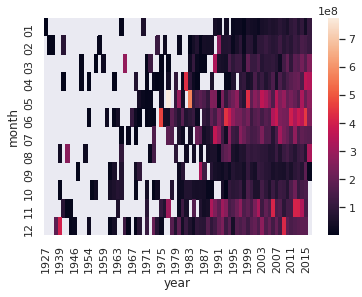

In [127]:
sns.heatmap(revenue_df)

## Style変更や付属情報

### .set()

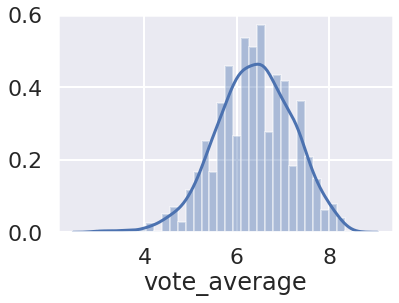

In [130]:
# context: paper, notebook, talk, poster
sns.set(context='poster')　
# sns.set_context('poster') 同じ
sns.distplot(df['vote_average'])

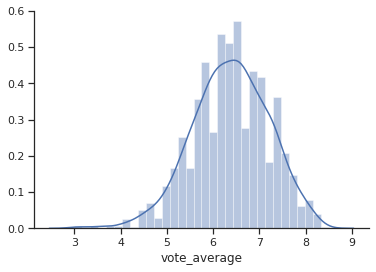

In [134]:
# style: darkgrid, whitegrid, dark, white, ticks
sns.set(style='ticks')
sns.distplot(df['vote_average'])
sns.despine()

In [135]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_movies', 'vote_average',
       'vote_count', 'movie_id', 'title_credits', 'cast', 'crew', 'profit',
       'evaluation', 'year', 'decade', 'month'],
      dtype='object')

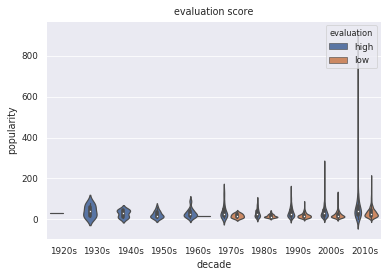

In [150]:
# palette: deep, muted, bright, pastel, dark, colorblind、hueで指定した色が変わる
# matplotlib colormapで検索
sns.set(context='paper', palette='deep')
sns.violinplot(x='decade', y='popularity', hue='evaluation', data=df.sort_values('decade'))
# hueを指定しない場合はviolinplot(palette='dark')
plt.title('evaluation score')
plt.savefig('../data/evaluation_score.png')

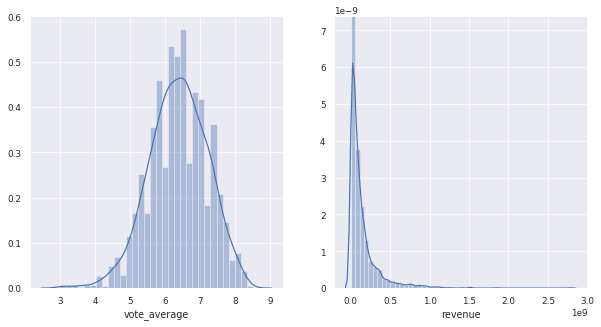

In [156]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df['vote_average'], ax=axes[0])
sns.distplot(df['revenue'], ax=axes[1])